# Predicting Credit card defaulters


#### For more information regarding this dataset, visit: <br />https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

This script will contain an initial exploration of the data, followed by some necessary preprocessing, <br />feature enineering and selection, and finally the models and results.

Let's start by importing the libraries used in the exploratory part:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns 
import math
from sklearn import preprocessing

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#Turn off pandas warning for changing variables
pd.options.mode.chained_assignment = None

In [2]:
credit = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\default of credit card clients.csv", header = 1)


##### First look

First, Let's see how the data exactly looks like, and whether there are some unlogical values observable in the first glimpse:
<br />
<br />

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



#### Weird values
We see that there are certain values that have not been 
mentioned by the authors (-2's and 0's for the Pay_N variables.)

These will be dealt with in a later stage. First switch order of columns and rename column names so it all makes a bit more sense
<br />
<br />


In [4]:
#Change columns order 

colnames = credit.columns.tolist()
colnames =  ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'default payment next month']
credit = credit[colnames]

#rename some columns so their name makes more sense
credit.columns = ['ID', 'CREDIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_APR', 'PAYSTAT_MAY', 'PAYSTAT_JUNE', 'PAYSTAT_JULY', 'PAYSTAT_AUG', 'PAYSTAT_SEP', 'CUR_BIL_APR', 'CUR_BIL_MAY', 'CUR_BIL_JUNE', 'CUR_BIL_JULY', 'CUR_BIL_AUG', 'CUR_BIL_SEP', 'PAID_APR', 'PAID_MAY', 'PAID_JUNE', 'PAID_JULY', 'PAID_AUG', 'PAID_SEP', 'DEFAULT']


###### Names and stuff
Now that's out the the way, lets change the numbers of categorical values to their respective category for more convenience<br /> during the exploration of the data

In [5]:
#Change values to their actual respective values
#Default status
credit.DEFAULT[credit.DEFAULT == 0] = 'Pays'
credit.DEFAULT[credit.DEFAULT== 1] = 'Defaults'


#Sex
credit.SEX[credit.SEX == 1] = 'Male'
credit.SEX[credit.SEX == 2] = 'Female'

#Marriage
credit.MARRIAGE[credit.MARRIAGE == 0] = 'Other'
credit.MARRIAGE[credit.MARRIAGE == 1] = 'Single'
credit.MARRIAGE[credit.MARRIAGE == 2] = 'Married'
credit.MARRIAGE[credit.MARRIAGE == 3] = 'Other'

#Education
credit.EDUCATION[credit.EDUCATION == 0] = 'Other'
credit.EDUCATION[credit.EDUCATION == 1] = 'Graduate School'
credit.EDUCATION[credit.EDUCATION == 2] = 'University'
credit.EDUCATION[credit.EDUCATION == 3] = 'High School'
credit.EDUCATION[credit.EDUCATION == 4] = 'Other'
credit.EDUCATION[credit.EDUCATION == 5] = 'Other'
credit.EDUCATION[credit.EDUCATION == 6] = 'Other'


In [6]:
#description of the data
credit.describe()

,ID,CREDIT,AGE,PAYSTAT_APR,PAYSTAT_MAY,PAYSTAT_JUNE,PAYSTAT_JULY,PAYSTAT_AUG,PAYSTAT_SEP,CUR_BIL_APR,...,CUR_BIL_JUNE,CUR_BIL_JULY,CUR_BIL_AUG,CUR_BIL_SEP,PAID_APR,PAID_MAY,PAID_JUNE,PAID_JULY,PAID_AUG,PAID_SEP
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,3.000000e+04,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700,38871.760400,...,43262.948967,4.701315e+04,49179.075167,51223.330900,5215.502567,4799.387633,4826.076867,5225.68150,5.921163e+03,5663.580500
std,8660.398374,129747.661567,9.217904,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802,59554.107537,...,64332.856134,6.934939e+04,71173.768783,73635.860576,17777.465775,15278.305679,15666.159744,17606.96147,2.304087e+04,16563.280354
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-339603.000000,...,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1256.000000,...,2326.750000,2.666250e+03,2984.750000,3558.750000,117.750000,252.500000,296.000000,390.00000,8.330000e+02,1000.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17071.000000,...,19052.000000,2.008850e+04,21200.000000,22381.500000,1500.000000,1500.000000,1500.000000,1800.00000,2.009000e+03,2100.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49198.250000,...,54506.000000,6.016475e+04,64006.250000,67091.000000,4000.000000,4031.500000,4013.250000,4505.00000,5.000000e+03,5006.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,...,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.00000,1.684259e+06,873552.000000


##### Interesting facts 
- The standard deviation of credit supplied is super high. This is also the case for the bills and the paid amounts.

- The min for the bills are very large negative numbers. Did they pay too much money back?

In [7]:
#Divide data by sex
male_female = credit.groupby('SEX')['SEX'].count()
print()
print('Percentage Females =', (male_female[0] / len(credit)))
print('Percentage Males =', (male_female[1] / len(credit)))

#Divide data by marital status
Marriage_perc = credit.groupby('MARRIAGE')['MARRIAGE'].count()

print()
print('Percentage Married =', (Marriage_perc[0] / len(credit)))
print('Percentage Single =', (Marriage_perc[2] / len(credit)))
print('Percentage Other =', (Marriage_perc[1] / len(credit)))

#Divide data by education
Education_perc =credit.groupby('EDUCATION')['EDUCATION'].count()

print()
print('Percentage Graduate School =', (Education_perc[0] / len(credit)))
print('Percentage University =',(Education_perc[3] / len(credit)))
print('Percentage High School =', (Education_perc[1] / len(credit)))
print('Percentage Other =', (Education_perc[2] / len(credit)))

#Divide data by default status in october
Default_perc = credit.groupby('DEFAULT')['DEFAULT'].count()
print()
print('Percentage Defaulting next month =', (Default_perc[0] / len(credit)))
print('Percentage Paying next month =', (Default_perc[1] / len(credit)))


Percentage Females = 0.6037333333333333
Percentage Males = 0.39626666666666666

Percentage Married = 0.5321333333333333
Percentage Single = 0.4553
Percentage Other = 0.012566666666666667

Percentage Graduate School = 0.35283333333333333
Percentage University = 0.4676666666666667
Percentage High School = 0.1639
Percentage Other = 0.0156

Percentage Defaulting next month = 0.2212
Percentage Paying next month = 0.7788


##### More interesting facts:
- The data contains more records for women than for men
- Most people are married, although not by a big margin
- The majority of the customers in the dataset attended university, or even grad school 
- About 22% of the customers are predicted to default on their payment
<br />
<br />

### Next: some exploratory plots

Let's start with some simple distributions of age and credit supplied:
<br />

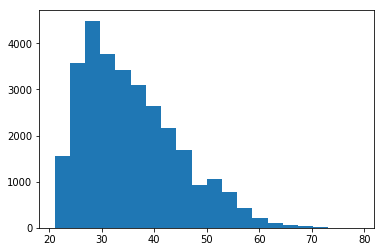

In [8]:
#plot a histogram to see the age distribution within the dataset
plt.hist(credit['AGE'], bins = 20)
plt.show()

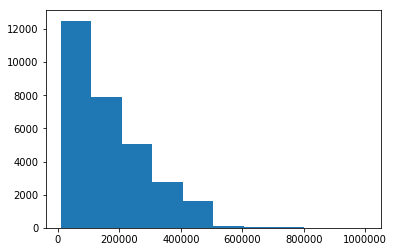

In [9]:
#Plot the amount of credit that is provided to the customers
plt.hist((credit.CREDIT), bins = 10)
plt.show()

##### Now let's group defaulters and non-defaulters with other variables  
This way we can see relatively which sex defaults more often, which marital background, and what educational background is more of influence. 
<br />
<br />

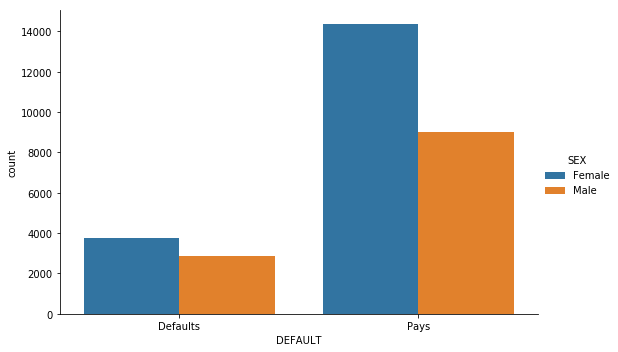

The percentage of women that default = 0.20776280918727916
The percentage of men that default = 0.2416722745625841


In [10]:
#From this plot it appears that relatively speaking man default more than women. 
sexplot = sns.catplot('DEFAULT', data = credit, hue = 'SEX', kind='count', aspect=1.5)
sexplot.set_xlabels('DEFAULT')
plt.show()

# Give the exact percentages of defaulting women vs defaulting men
default_female = len(credit[(credit.SEX == 'Female') & (credit.DEFAULT == 'Defaults')]) / len(credit[(credit.SEX == 'Female')])
default_male = len(credit[(credit.SEX == 'Male') & (credit.DEFAULT == 'Defaults')]) / len(credit[(credit.SEX == 'Male')])

print('The percentage of women that default =', str(default_female))
print('The percentage of men that default =', str(default_male))

Men default more often than women. Whether the difference is significant is difficult to tell.
<br />
<br />

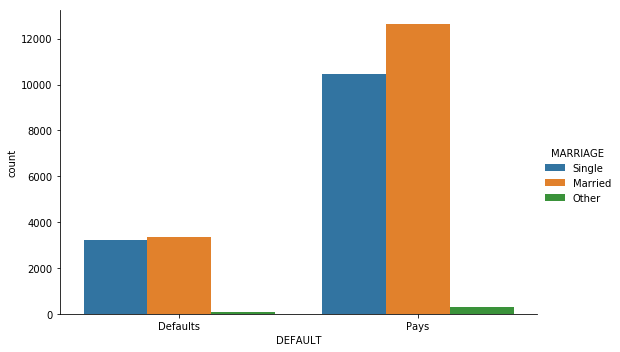

The percentage of singles that default = 0.23471703638626545
The percentage of married people that default = 0.20928338762214985
The percentage of others that default = 0.23607427055702918


In [11]:
#It seems that singles are relatively a bit less likely to pay their credit card bills than married couples 
Mariedplot = sns.catplot('DEFAULT', data = credit, hue = 'MARRIAGE', kind='count', aspect=1.5)
Mariedplot.set_xlabels('DEFAULT')
plt.show()

# Provide percentages below the plot
default_Single = (len(credit[(credit.MARRIAGE == 'Single') & (credit.DEFAULT == 'Defaults')]) 
                  / len(credit[(credit.MARRIAGE == 'Single')]))

default_Married = (len(credit[(credit.MARRIAGE == 'Married') & (credit.DEFAULT == 'Defaults')]) / 
                   len(credit[(credit.MARRIAGE == 'Married')]))

default_Other = (len(credit[(credit.MARRIAGE == 'Other') & (credit.DEFAULT == 'Defaults')]) / 
                  len(credit[(credit.MARRIAGE == 'Other')]))

print('The percentage of singles that default =', str(default_Single))
print('The percentage of married people that default =', str(default_Married))
print('The percentage of others that default =', str(default_Other))

When looking at the exact percentages, we see that married people default less than singles or others.
<br />
<br />

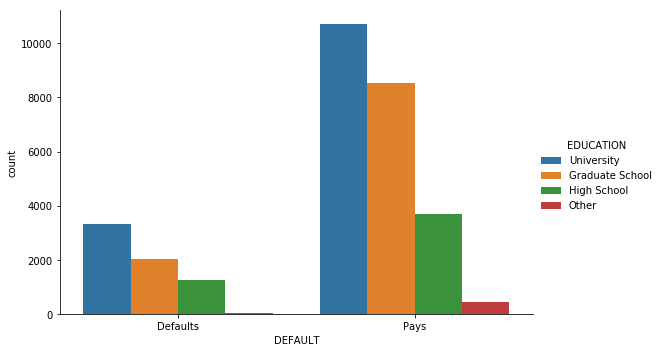

The percentage of University grads that default = 0.23734853884533144
The percentage of Graduate School grads that default = 0.19234766178554558
The percentage of High school grads people that default = 0.2515761643278422
The percentage of others that default = 0.07051282051282051


In [12]:
# From this plot alone, there is no distinct correlation visible between education and paying the bills 
Mariedplot = sns.catplot('DEFAULT', data = credit, hue = 'EDUCATION', kind='count', aspect=1.5)
Mariedplot.set_xlabels('DEFAULT')
plt.show()

#It appears that high school graduates default most often and Grad school graduates default least often 
#(''other'' actually defaults least often but we have no  clue what they represent and they are a very small portion of the set) 

default_University = (len(credit[(credit.EDUCATION == 'University') & (credit.DEFAULT == 'Defaults')]) / 
                      len(credit[(credit.EDUCATION == 'University')]))

default_Graduate = (len(credit[(credit.EDUCATION == 'Graduate School') & (credit.DEFAULT == 'Defaults')]) / 
                    len(credit[(credit.EDUCATION == 'Graduate School')]))

default_HighSchool = (len(credit[(credit.EDUCATION == 'High School') & (credit.DEFAULT == 'Defaults')]) / 
                      len(credit[(credit.EDUCATION == 'High School')]))

default_other2 = (len(credit[(credit.EDUCATION == 'Other') & (credit.DEFAULT == 'Defaults')]) / 
                  len(credit[(credit.EDUCATION == 'Other')]))

print('The percentage of University grads that default =', str(default_University))
print('The percentage of Graduate School grads that default =', str(default_Graduate))
print('The percentage of High school grads people that default =', str(default_HighSchool))
print('The percentage of others that default =', str(default_other2))

##### More plots!
The following plots will provide some more information on what the observations are made out of. 
<br />
<br />

(array([3246., 1263.,  916.,  606.,  319.,  121.,  146.,   10.,    5.,
           4.]),
 array([ 10000.,  83000., 156000., 229000., 302000., 375000., 448000.,
        521000., 594000., 667000., 740000.]),
 <a list of 10 Patch objects>)

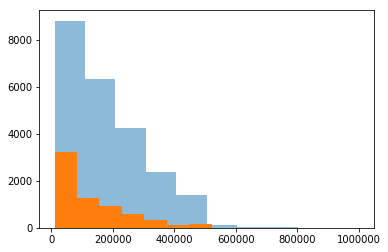

In [13]:
#Lets see if there is an observable difference in the distribution of credit for defaulters and non-defaulters

Defaulters = credit[(credit.DEFAULT == 'Defaults')]
Payers = credit[(credit.DEFAULT == 'Pays')]
plt.hist((Payers.CREDIT), bins = 10, alpha = 0.5)
plt.hist((Defaulters.CREDIT), bins = 10)

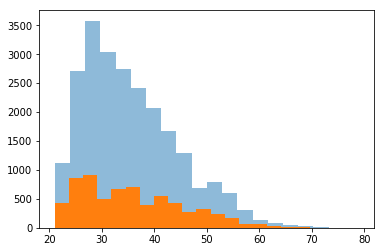

In [14]:
# Create histograms of age and default status
defaulted = credit[credit.DEFAULT == 'Defaults']
payedduly = credit[credit.DEFAULT == 'Pays']

plt.hist(payedduly.AGE, bins = 20, alpha = 0.5)
plt.hist(defaulted.AGE, bins = 20)
plt.show()

Although it is difficult to see properly, it appears that the proportion of defaulters increases as people get older

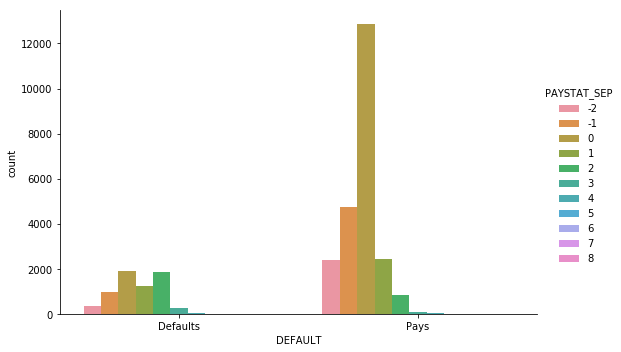

In [15]:
# Plot the default status with their payment status of the previous month
paymentplot = sns.catplot('DEFAULT', data = credit, hue = 'PAYSTAT_SEP', kind='count', aspect=1.5)
paymentplot.set_xlabels('DEFAULT')
plt.show()

The plot shows that there are comparatively a lot less 0´s, -1´s and -2's that defaulted in the month than that did not default. <br /> 
<br />
Here a closer look at the ones that defaulted:


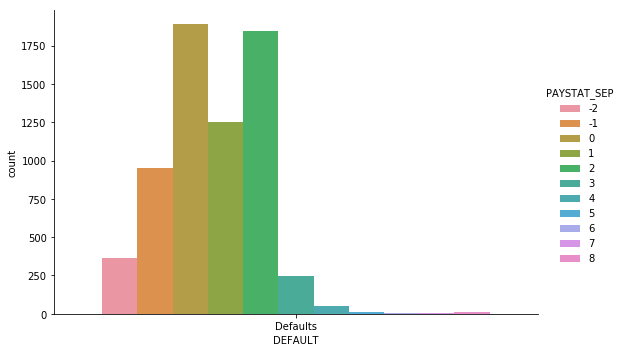

In [16]:
sns.catplot('DEFAULT', data = defaulted, hue = 'PAYSTAT_SEP', kind='count', aspect=1.5)
plt.show()

<br />
... and the ones that did not default on their payments:

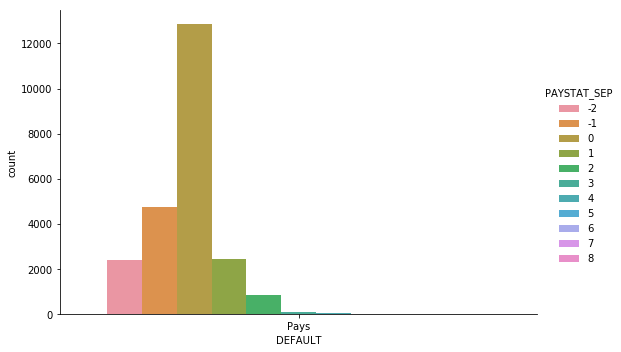

In [17]:
sns.catplot('DEFAULT', data = payedduly, hue = 'PAYSTAT_SEP', kind='count', aspect=1.5)
plt.show()

<br />
Let's take a look at the correlations for a few of the numerical variables:

               CREDIT       AGE  CUR_BIL_AUG  CUR_BIL_SEP  PAID_AUG  PAID_SEP
CREDIT       1.000000  0.144713     0.278314     0.285430  0.178408  0.195236
AGE          0.144713  1.000000     0.054283     0.056239  0.021785  0.026147
CUR_BIL_AUG  0.278314  0.054283     1.000000     0.951484  0.100851  0.280365
CUR_BIL_SEP  0.285430  0.056239     0.951484     1.000000  0.099355  0.140277
PAID_AUG     0.178408  0.021785     0.100851     0.099355  1.000000  0.285576
PAID_SEP     0.195236  0.026147     0.280365     0.140277  0.285576  1.000000
AxesImage(43.2,25.92;223.2x223.2)


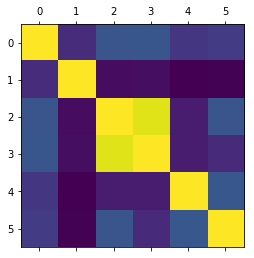

In [18]:
credit_corsample = credit[["CREDIT", "AGE", "CUR_BIL_AUG", "CUR_BIL_SEP","PAID_AUG" , "PAID_SEP"]]
print(credit_corsample.corr())
print(plt.matshow(credit_corsample.corr()))

### Default status of the other months:
<br />
The defaulting variable in our dataset is generated by a Sorting Smoothing Method.<br /> 
Lets see if the same percentage of defaulting is also observable in other months

In [19]:
#Use the paystat variables to see whether the customers defaulted
default_oct = (Default_perc[0] / len(credit))
default_sep = len(credit[(credit.PAYSTAT_SEP > 0)])/len(credit)
default_aug = len(credit[(credit.PAYSTAT_AUG > 0)])/len(credit)
default_july = len(credit[(credit.PAYSTAT_JULY > 0)])/len(credit)
default_june = len(credit[(credit.PAYSTAT_JUNE > 0)])/len(credit)
default_may = len(credit[(credit.PAYSTAT_MAY > 0)])/len(credit)
default_apr = len(credit[(credit.PAYSTAT_APR > 0)])/len(credit)

print("Defaults in October:", default_oct)
print("Defaults in September:", default_sep)
print("Defaults in August:", default_aug)
print("Defaults in July:", default_july)
print("Defaults in June:", default_june)
print("Defaults in May:", default_may)
print("Defaults in April:", default_apr)


Defaults in October: 0.2212
Defaults in September: 0.22726666666666667
Defaults in August: 0.14793333333333333
Defaults in July: 0.14043333333333333
Defaults in June: 0.117
Defaults in May: 0.09893333333333333
Defaults in April: 0.10263333333333333


<br/>
It appears that the amount of people defaulting is increasing over the months. lets plot this.

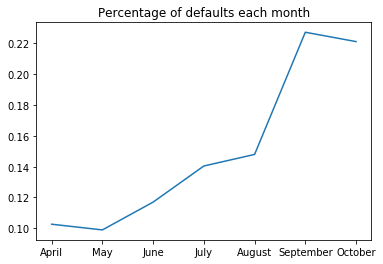

In [20]:
#Make a plot for the default percentages 
plt.plot(np.array([default_apr, default_may, default_june, default_july, default_aug ,default_sep, default_oct]))
x = np.array([0,1,2,3,4,5,6])
my_xticks = ['April','May', 'June', 'July', 'August', 'September', 'October']
plt.xticks(x, my_xticks)
plt.title("Percentage of defaults each month")
plt.show()

To me this is quite interesting. What could be the reason for this? <br />Are people perhaps spending more in later months, which makes it more difficult to pay back their loans? <br /> <br />Let's find out:

In [21]:
#Make an array with the mean of each column
credit_means = np.mean(credit)

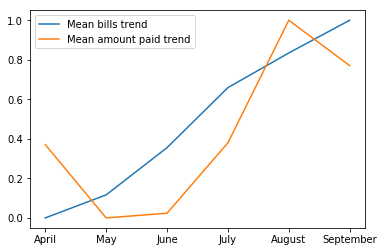

In [22]:
#Plot the trend of the mean bill increase and the mean paid amount in 1 plot
mean_bill = pd.DataFrame(credit_means[9:15])
mean_paid = pd.DataFrame(credit_means[15:21])

#change row index to sequential numbers
mean_bill.index = ['April','May', 'June', 'July', 'August', 'September']
mean_paid.index = ['April','May', 'June', 'July', 'August', 'September']

#turn into 1 dataframe 
Mean_bill_paid = pd.concat([mean_bill, mean_paid], axis=1, sort=False)
Mean_bill_paid.columns = ['Average Bill', 'Average Payment']

#scale so it fits in the same plot as the previous graph
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(Mean_bill_paid)
means_normalized = pd.DataFrame(scaled_array)

#plot the actual trend
plt.plot(means_normalized)
plt.legend(('Mean bills trend', 'Mean amount paid trend'))
x = np.array([0,1,2,3,4,5])
my_xticks = ['April','May', 'June', 'July', 'August', 'September']
plt.xticks(x, my_xticks)

plt.show()


## Warning!
### This graph is terrible! 
It looks like people pay more in April and August than what's on their respective bill. 
This is caused by the normalization of the features.

Let's go on with the exploration, and se whether bills grew more or less than the amount payed back over the months:

In [23]:
#how much did bills grow when comparing the max to the min?
mean_april = (mean_bill.iloc[0, 0])
mean_september =  (mean_bill.iloc[5, 0])
print("growth bills =", str(mean_september / mean_april))

#how much did payments grow when comparing the max to the min?
mean_april = (mean_paid.iloc[1, 0])
mean_september =  (mean_paid.iloc[4, 0])
print("growth payments =", str(mean_september / mean_april))

growth bills = 1.3177517656236635
growth payments = 1.233733124383528


#### Dealing with some weird observations
In the beginning of this script, when printing the first rows of the dataset, it became observable that 
there are rows <br /> 
in the data where a person did not have any outstanding credit in September, but were still
predicted to default <br />
the following month. This is strange because they had no credit to default on. 
<br /><br />Let's see how many observations suffer from this inconsistency:


In [24]:
#get the number and the perecntage of defaulters without debts
Default_nobill = len(credit[((credit.CUR_BIL_SEP == 0) & (credit.DEFAULT == 'Defaults'))])
Default_nobill_perc = (len(credit[((credit.CUR_BIL_SEP == 0) & (credit.DEFAULT == 'Defaults'))])/
                       len(credit[(credit.DEFAULT == 'Defaults')]))

print("There are", str(Default_nobill), "people predicted to default without having any debts.")
print("This is",  str(Default_nobill_perc), "percent of all the the predicted defaults")


There are 534 people predicted to default without having any debts.
This is 0.08047016274864376 percent of all the the predicted defaults


These values should be dealt with when starting the feature engineering since they can mess up our modeling

#### Do payments and bills allign?
As we saw earlier, bills are in generally a lot higher than what is being paid. However, it could be possible that people are allowed to have a long term debt. <br />
Therefore it should be interesting to see if the differences between each month add up to the payments that are made.
<br /><br />
Lets find that out now:


In [25]:
#Make variables that should entail the amount spent in a specific month:
diffbill_may_apr = credit.CUR_BIL_MAY - credit.CUR_BIL_APR
diffbill_june_may = credit.CUR_BIL_JUNE - credit.CUR_BIL_MAY
diffbill_july_june = credit.CUR_BIL_JULY - credit.CUR_BIL_JUNE
diffbill_aug_july = credit.CUR_BIL_AUG - credit.CUR_BIL_JULY
diffbill_sep_aug = credit.CUR_BIL_SEP - credit.CUR_BIL_AUG

diffbill_may_apr[diffbill_may_apr < 0] = 0
diffbill_june_may[diffbill_june_may < 0] = 0
diffbill_july_june[diffbill_july_june < 0] = 0
diffbill_aug_july[diffbill_aug_july < 0] = 0
diffbill_sep_aug[diffbill_sep_aug < 0] = 0

print(diffbill_may_apr.corr(credit.PAID_JUNE))
print(diffbill_june_may.corr(credit.PAID_JULY))
print(diffbill_july_june.corr(credit.PAID_AUG))
print(diffbill_aug_july.corr(credit.PAID_SEP))

#There seems no strong correlation between the bills and the payment made the month afterwards 
print()

print(credit.CUR_BIL_MAY.corr(credit.PAID_JUNE))
print(credit.CUR_BIL_JUNE .corr(credit.PAID_JULY))
print(credit.CUR_BIL_JULY.corr(credit.PAID_AUG))
print(credit.CUR_BIL_AUG.corr(credit.PAID_SEP))



0.23106889606954445
0.26279843291846233
0.4319461436509805
0.23270576162678885

0.2931184631844314
0.30002252911164895
0.3169359771796885
0.28036535701410076


The correlation between the full bill and the payment the month after is higher, indicating that if people skip a payment, they are more likely to pay the complete bill rather then only pay for the bill for the specific month only (makes sense)

### Another warning: 
This correlation analysis is REALLY bad. I made a thinking error when making the first variables. Oops

#### End of the file

That was it for this file. I'll save it now and go on to the preprocessing part. There will be some more interesting facts hidden in that file, so be sure to check it out!

#### Bye!

In [26]:
# Save the dataframe and create a new 
credit.to_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\Credit_1.csv")